In [2]:
!nvidia-smi

Thu Sep 26 03:26:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['retina']
plt.rc('font', size=12)
plt.style.use('seaborn-darkgrid')

In [0]:
# 1. generate the artificial dataset.
N = 10000

noise = np.random.normal(0.0, 0.1, N)
X = np.random.normal(1.0, 0.1, N)
obs_y = (0.65 * X) + 0.5 + noise

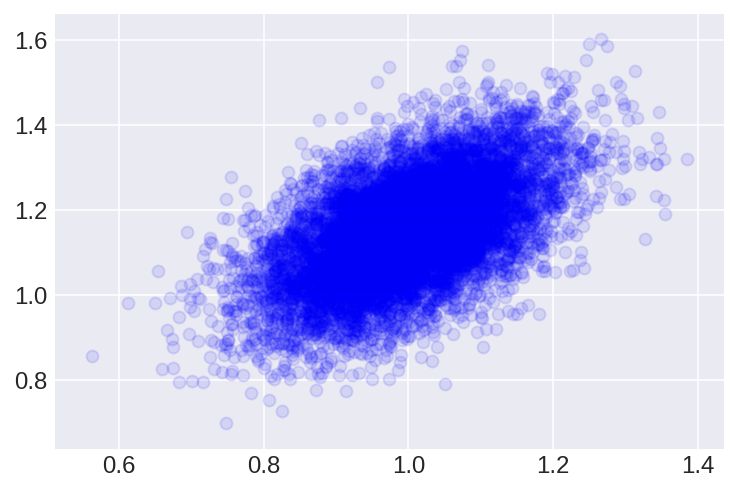

In [5]:
plt.scatter(X, obs_y, c='b', alpha=0.1)
plt.show()

In [0]:
# 2. model that data with a simple regression model
with pm.Model() as exercise2:

    stdev = pm.HalfNormal('stdev', sd=1.)
    intercept = pm.Normal('intercept', mu=0.0, sd=1.)
    coeff = pm.Normal('beta', mu=0.5, sd=1.)

    expected_value = (X * coeff) + intercept
    y = pm.Normal('y', mu=expected_value, sd=stdev, observed=obs_y)

In [7]:
with exercise2:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, intercept, stdev]
100%|██████████| 1500/1500 [00:15<00:00, 95.23it/s]
The acceptance probability does not match the target. It is 0.9012591896567868, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9287556313888427, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [0]:
# pm.traceplot(trace, ['intercept', 'beta', 'stdev']);

In [10]:
with exercise2:
    ppc = pm.sample_ppc(trace, samples=1000) # NOTE: soon to be deprecated and replaced with sample_posterior_predictive

y_preds = ppc['y']
print("y_preds shape = ", ppc['y'].shape)

# Same thing, but now using the expectation
expected_y_pred = np.reshape(np.mean(y_preds, axis=0), [-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  
100%|██████████| 1000/1000 [00:02<00:00, 337.47it/s]


y_preds shape =  (1000, 10000)


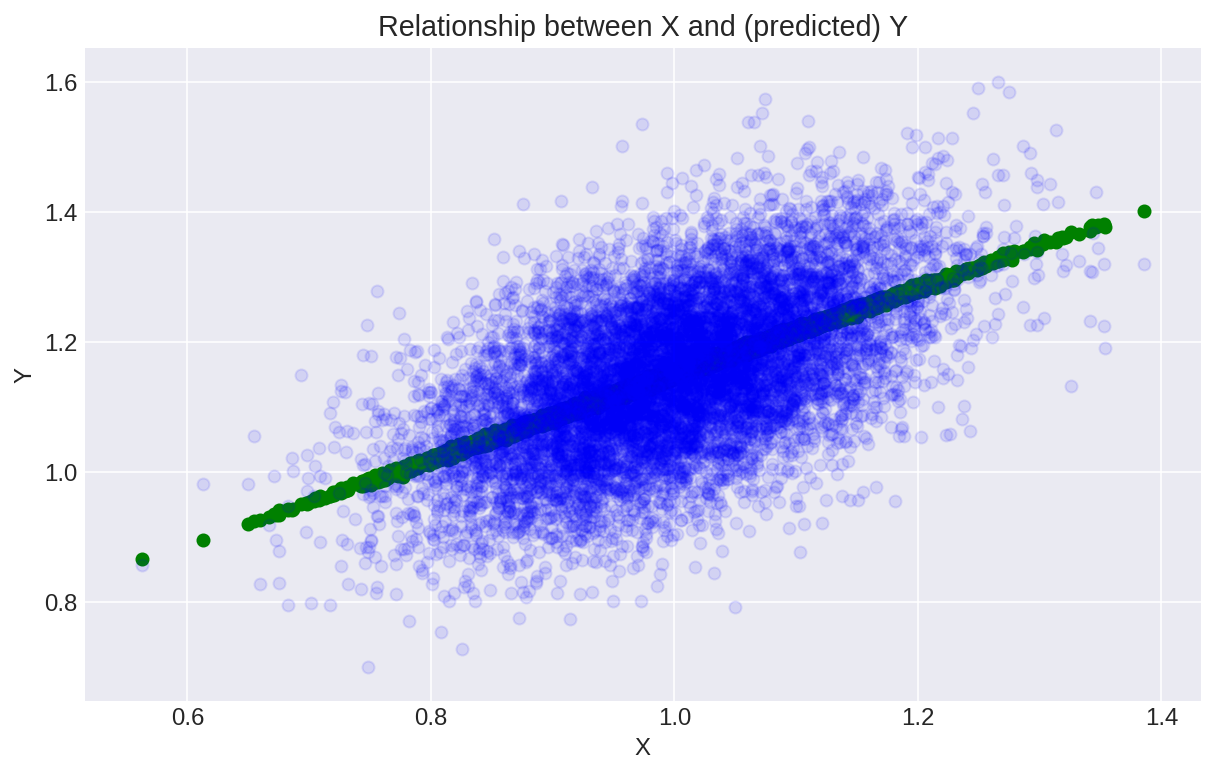

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X, expected_y_pred, c='g')
plt.scatter(X, obs_y, c='b', alpha=0.1)
plt.title("Relationship between X and (predicted) Y")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

